

**MOVIE RATING PREDICTION WITH PYTHON**

***IMPORTING REQUIRED LIBRARY***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#import warning
import warnings
warnings.filterwarnings('ignore')

*READ THE DATASET*

In [ ]:
df=pd.read_excel("/content/sample_data/movie rating data set1.xlsx")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
df.tail(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15489,Zor Lagaa Ke... Haiya!,-2009.0,NaN,"Comedy, Drama, Family",6.1,59,Girish Girija Joshi,Meghan Jadhav,Mithun Chakraborty,Riya Sen
15490,Zor: Never Underestimate the Force,-1998.0,157 min,"Action, Drama, Thriller",4.3,268,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji
15491,Zordaar,-1996.0,NaN,Action,4.7,29,Ajay Kashyap,Mahesh Anand,Vikas Anand,Bob Christo
15492,Zorro,-1975.0,150 min,"Action, Adventure, Comedy",5.6,33,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15495,Zulf Ke Saye Saye,-1983.0,NaN,NaN,NaN,NaN,Anand Sagar,Roohi Berde,Rakesh Pandey,NaN
15496,Zulm Aur Inteqaam,-1986.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15497,Zulm Hi Zulm,-1996.0,NaN,Drama,NaN,NaN,Ved Prakash,Akashdeep,Huma Khan,Amita Nangia
15498,Zulm Ka Badla,-1985.0,NaN,"Action, Crime, Drama",4.9,11,Chand,K. Prasad,Rakesh Roshan,Anita Raj


**GETTING INFORMATION ABOUT THE DATA**

In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [ ]:
df.loc[0]

Name                       
Year                    NaN
Duration                NaN
Genre                 Drama
Rating                  NaN
Votes                   NaN
Director      J.S. Randhawa
Actor 1            Manmauji
Actor 2              Birbal
Actor 3     Rajendra Bhatia
Name: 0, dtype: object

In [ ]:
attribute=df.columns
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
df['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [ ]:
rating=df['Rating'].value_counts()
print(rating)

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


**CHECKING MISSING VALUES IN DATA SET**

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.notnull().sum()

Name        15509
Year        14981
Duration     7240
Genre       13632
Rating       7919
Votes        7920
Director    14984
Actor 1     13892
Actor 2     13125
Actor 3     12365
dtype: int64

In [ ]:
df.dropna().sum()

<ipython-input-22-7457110a6b7c>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.dropna().sum()


Year                                              -11296765.0
Duration    109 min110 min147 min142 min82 min116 min96 mi...
Genre       DramaComedy, RomanceComedy, Drama, MusicalDram...
Rating                                                33379.8
Votes                                                15265999
Director    Gaurav BakshiOvais KhanRahul RawailShoojit Sir...
Actor 1     Rasika DugalPrateikBobby DeolJimmy SheirgillYa...
Actor 2     Vivek GhamandeIshita RajAishwarya Rai Bachchan...
Actor 3     Arvind JangidSiddhant KapoorShammi KapoorYashp...
dtype: object

In [ ]:
df.fillna(0).sum()

<ipython-input-26-a070baa6df12>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(0).sum()


Year     -29767430.0
Rating       46259.8
dtype: float64

**CHECKING DUPLICATES**

In [ ]:
data=df.drop_duplicates(subset="Votes")
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
...,...,...,...,...,...,...,...,...,...,...
15440,Zila Ghaziabad,-2013.0,142 min,"Action, Crime, Thriller",3.6,1301,Kumar Anand,Kushagra Anand,Vivek Oberoi,Usman Rao
15447,Zinda,-2006.0,116 min,"Action, Drama, Mystery",4.9,3314,Sanjay Gupta,Sanjay Dutt,John Abraham,Lara Dutta
15476,Zindagi Na Milegi Dobara,-2011.0,155 min,"Comedy, Drama",8.2,70344,Zoya Akhtar,Hrithik Roshan,Farhan Akhtar,Abhay Deol
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana


In [ ]:
df.value_counts("Votes")

Votes
8         227
7         224
9         221
6         213
10        175
         ... 
1844        1
1843        1
1841        1
1840        1
$5.16M      1
Length: 2034, dtype: int64

**VISUALIZATION OF DATA**

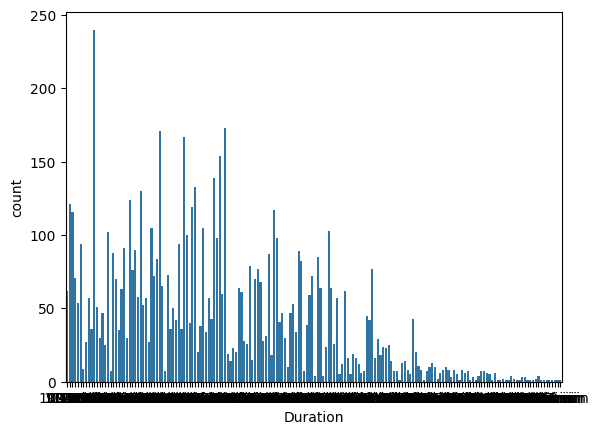

In [ ]:
sns.countplot(x='Duration',data=df)
plt.show()

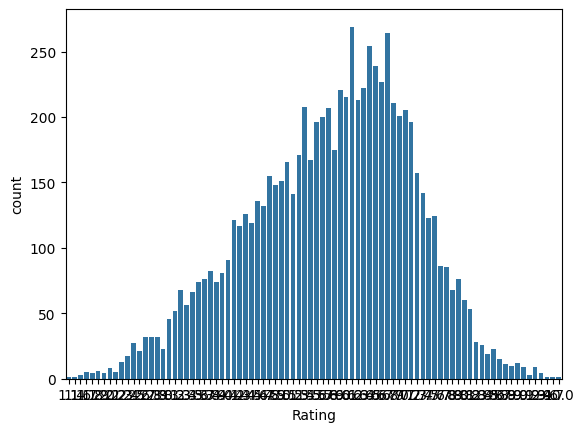

In [ ]:
sns.countplot(x='Rating',data=df)
plt.show()

**SCATTER PLOT**

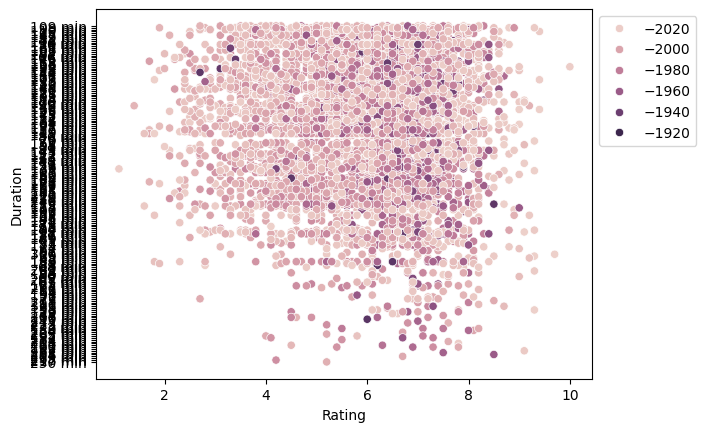

In [ ]:
sns.scatterplot(x="Rating", y="Duration",hue="Year", data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


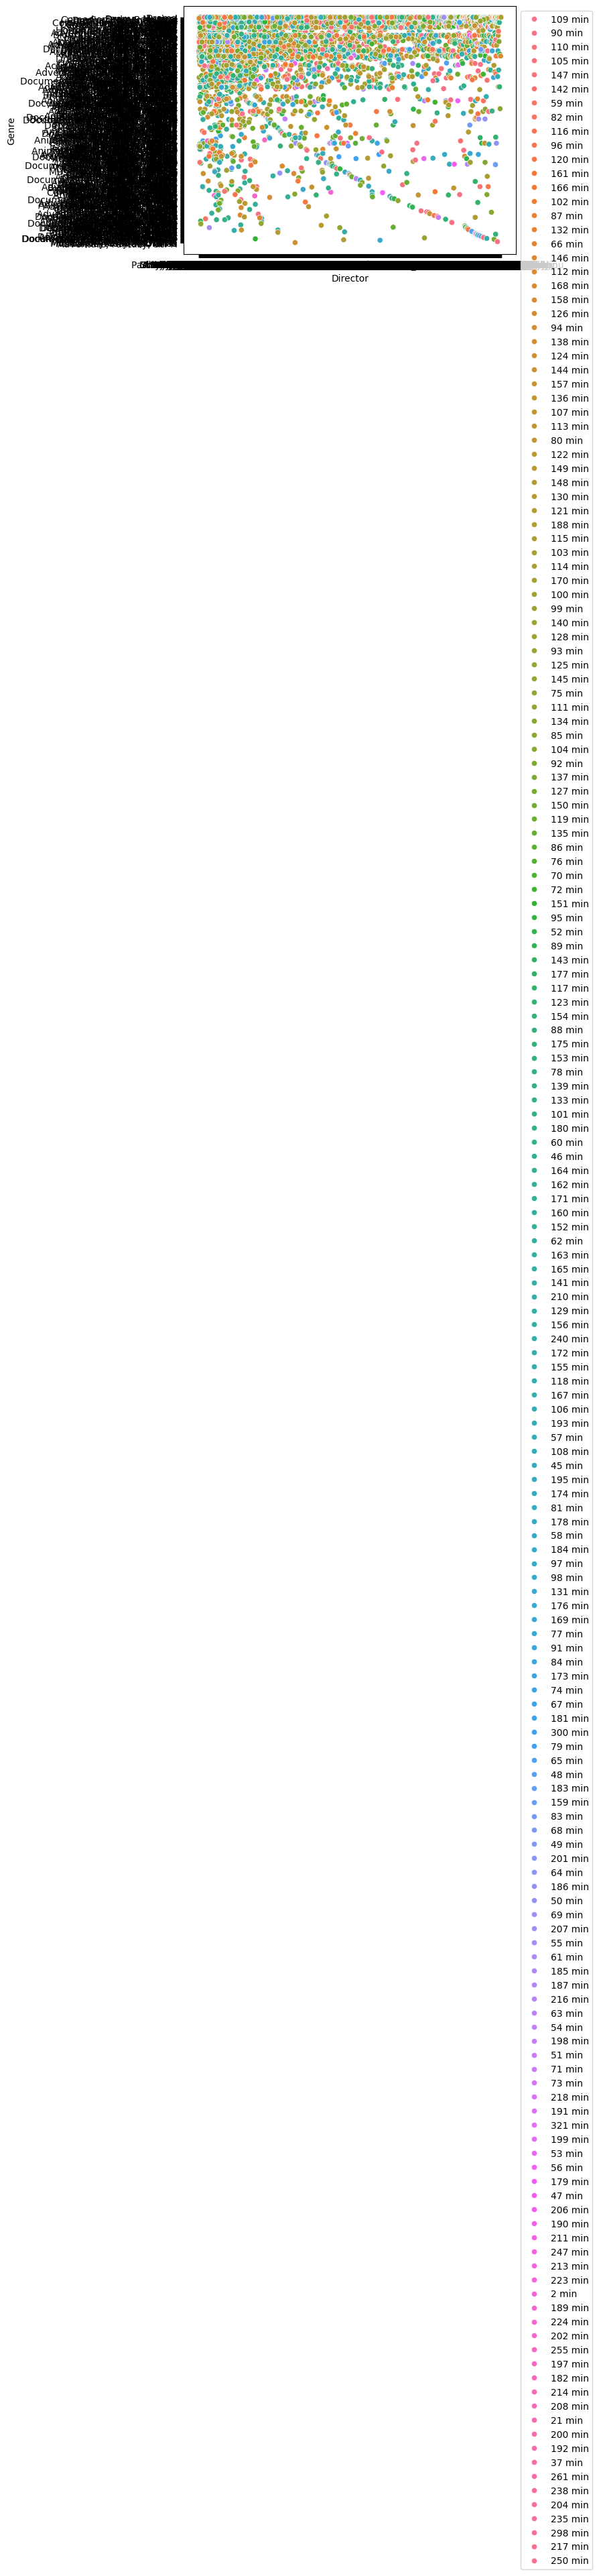

In [ ]:
sns.scatterplot(x="Director", y="Genre",hue="Duration", data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

**PAIR PLOT**

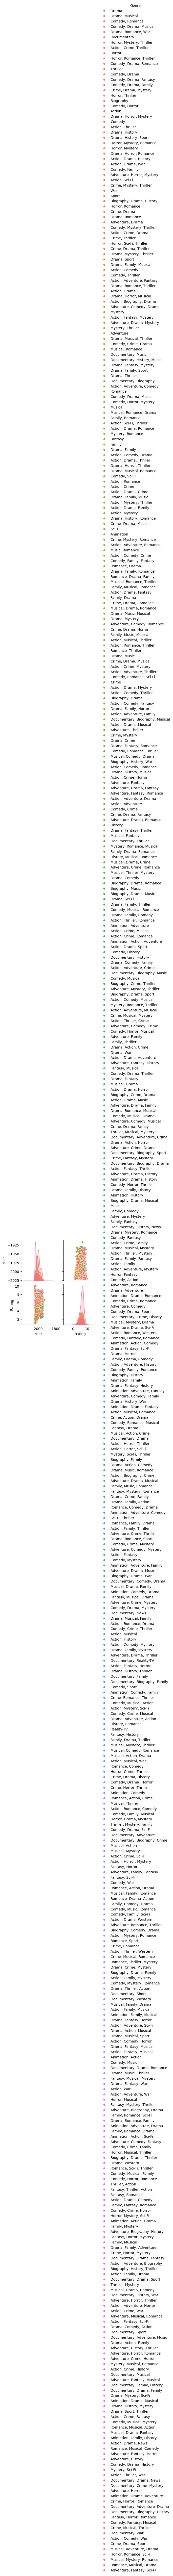

In [ ]:
sns.pairplot(df.drop(['Votes'], axis = 1),  hue="Genre", height=2)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


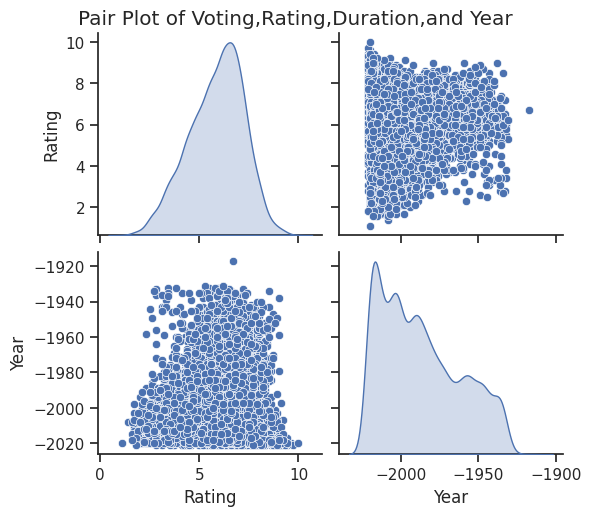

In [ ]:
columns_of_interest=['Votes','Rating','Duration','Year']
sns.set(style='ticks')
sns.pairplot(df[columns_of_interest],diag_kind='kde',markers='o',palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting,Rating,Duration,and Year',y=1.02)
plt.show()

**HISTPLOT**

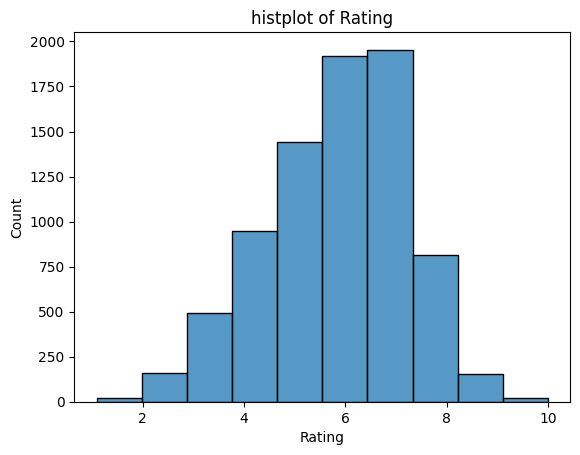

In [ ]:
sns.histplot(df['Rating'],bins=10)
plt.title("histplot of Rating")
plt.show()

**DISTPLOT**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new func

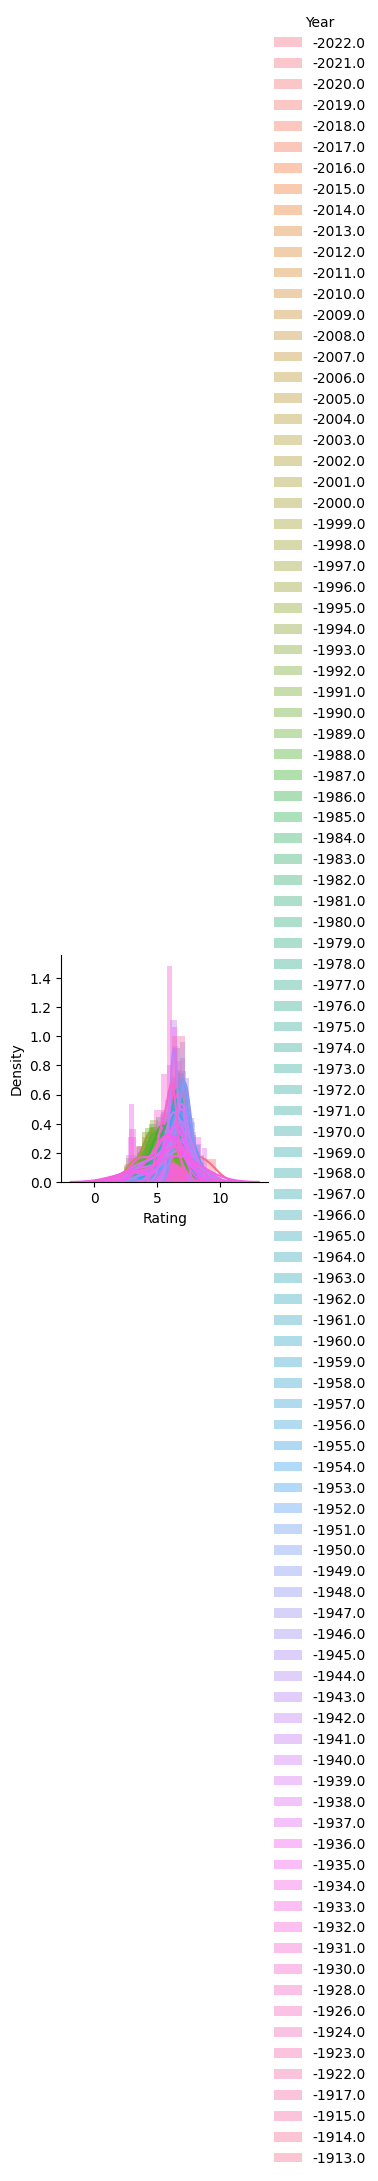

In [ ]:
plot = sns.FacetGrid(df, hue="Year")
plot.map(sns.distplot, "Rating").add_legend()
plt.show()

**HANDLING CORRELATION**

In [ ]:
df.corr(method='pearson')

<ipython-input-20-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Year,Rating
Year,1.000000,0.166673
Rating,0.166673,1.000000


**HEAT MAP**

<ipython-input-21-8df16c40d998>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson').drop([], axis=1).drop([], axis=0),


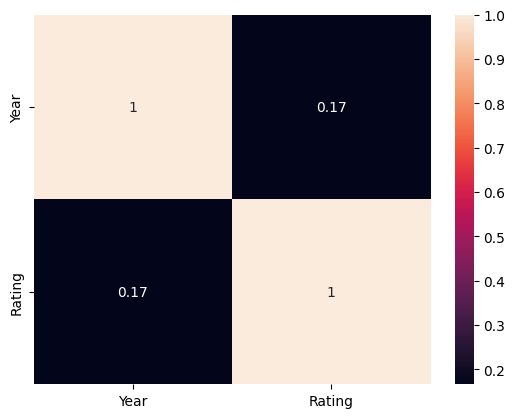

In [ ]:
sns.heatmap(df.corr(method='pearson').drop([], axis=1).drop([], axis=0),
            annot = True);
plt.show()


**HIGHEST RATED MOVIES**

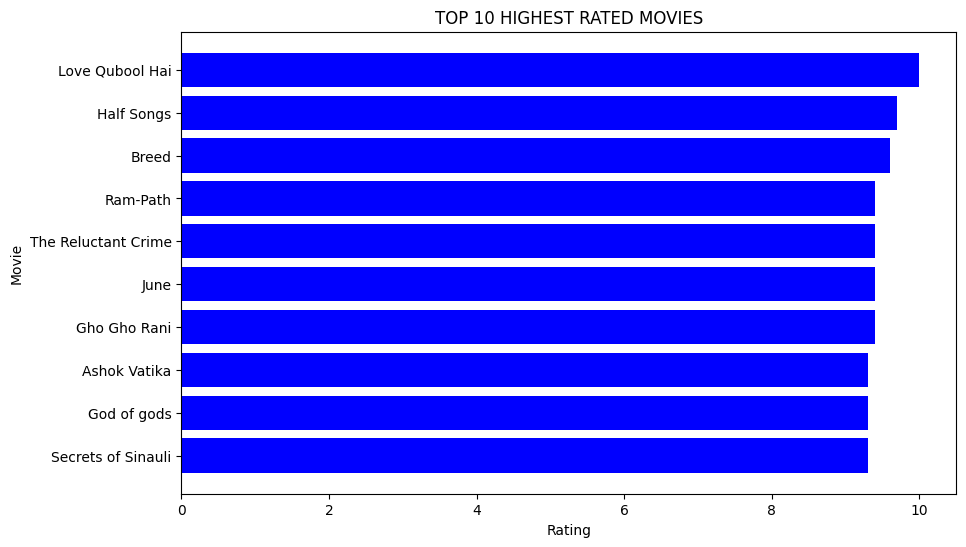

In [ ]:
top_rated_movie=df.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movie['Name'],top_rated_movie['Rating'],color='blue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('TOP 10 HIGHEST RATED MOVIES')
plt.gca().invert_yaxis()
plt.show()

**MODEL TRAINING AND TESTING**

In [ ]:
df['Year']=df['Year'].astype(str)
df['Duration']=df['Duration'].astype(str)
df['Year']=df['Year'].str.extract('(\d+)').astype(float)
df['Duration']=df['Duration'].str.extract('(\d+)').astype(float)
x=df[['Year','Duration','Votes']]
y=df['Rating']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
import numpy as np

# Convert 'Year' and 'Duration' columns to numeric, handling non-numeric values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Drop rows with NaN values in features
df.dropna(subset=['Year', 'Duration'], inplace=True)

# Drop rows with NaN values in target variable
df.dropna(subset=['Rating'], inplace=True)

# Define features (X) and target variable (y)
X = df[['Year', 'Duration', 'Votes']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 1.060606221312931
Mean Squared Error: 1.707331028148804
R-squared: 0.07798737059748762


**PRDICTION IN VISUALIZATION FOR BETTER UNDERSTANDING**

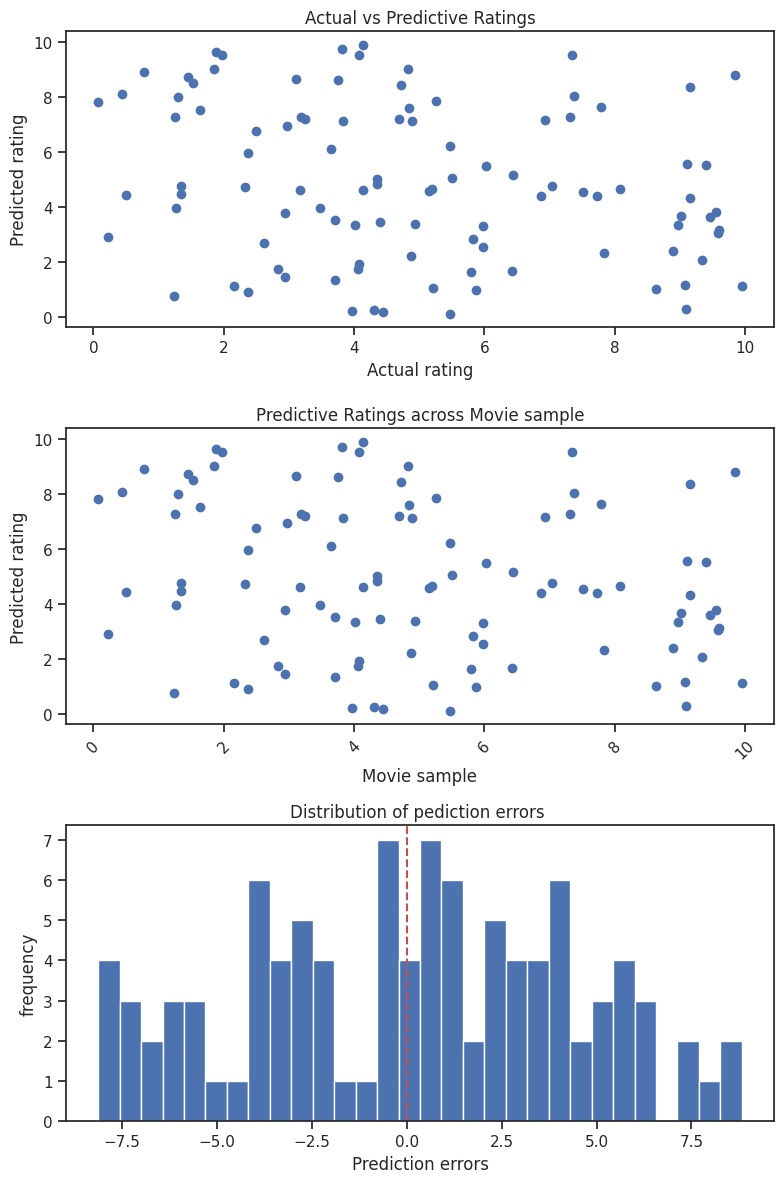

In [ ]:
y_test=np.random.rand(100)*10
y_pred=np.random.rand(100)*10
errors=y_test-y_pred
fig,axs = plt.subplots(3,1,figsize=(8,12))
axs[0].scatter(y_test,y_pred)
axs[0].set_xlabel("Actual rating")
axs[0].set_ylabel("Predicted rating")
axs[0].set_title("Actual vs Predictive Ratings")
#line plot
movie_samples=np.arange(1,len(y_pred)+1)
axs[1].scatter(y_test,y_pred)
axs[1].set_xlabel("Movie sample")
axs[1].set_ylabel("Predicted rating")
axs[1].set_title("Predictive Ratings across Movie sample")
axs[1].tick_params(axis='x',rotation=45)

#histogram
axs[2].hist(errors,bins=30)
axs[2].set_xlabel("Prediction errors")
axs[2].set_ylabel("frequency")
axs[2].set_title("Distribution of pediction errors ")
axs[2].axvline(x=0,color='r',linestyle='--')
plt.tight_layout()
plt.show()
